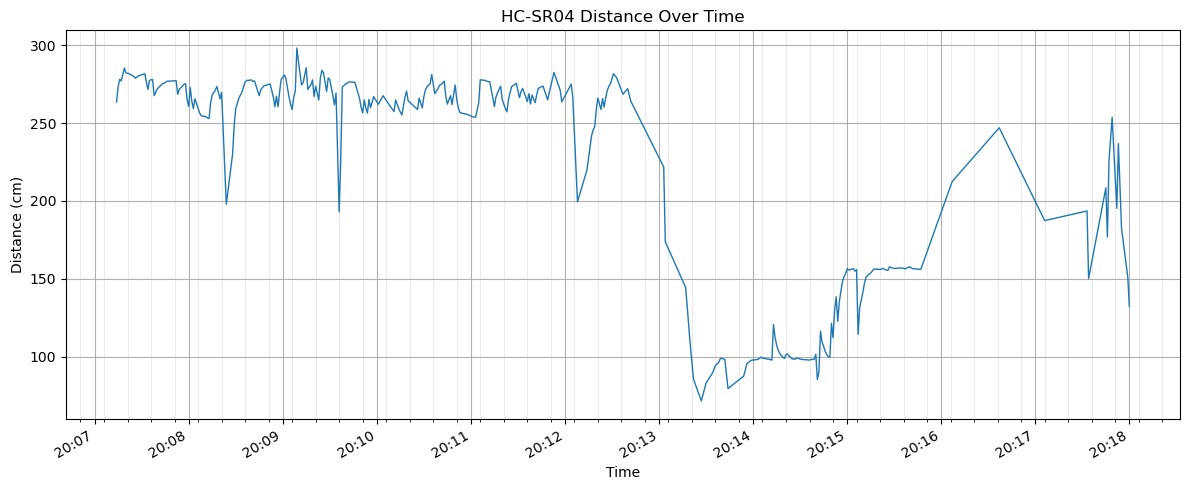

In [8]:
# %matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# 1) Load CSV
csv_path = "ultra_log.csv"
df = pd.read_csv(csv_path, parse_dates=['timestamp_iso'])
df['distance_cm'] = pd.to_numeric(df['distance_cm'], errors='coerce')
df = df.dropna(subset=['timestamp_iso', 'distance_cm']).sort_values('timestamp_iso')

# 2) Line graph (distance vs time)
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df['timestamp_iso'], df['distance_cm'], linewidth=1)

ax.set_title('HC-SR04 Distance Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Distance (cm)')

# 3) More accurate time stamps on the bottom
t0, t1 = df['timestamp_iso'].iloc[0], df['timestamp_iso'].iloc[-1]
span_sec = (t1 - t0).total_seconds()

if span_sec <= 120:  # <= 2 minutes: show seconds + milliseconds
    ax.xaxis.set_major_locator(mdates.SecondLocator(interval=1))
    # Show milliseconds (trim microseconds to 3 digits)
    ax.xaxis.set_major_formatter(FuncFormatter(
        lambda x, pos: mdates.num2date(x).strftime('%H:%M:%S.%f')[:-3]
    ))
    ax.xaxis.set_minor_locator(mdates.SecondLocator(interval=1))
elif span_sec <= 600:  # <= 10 minutes: show seconds
    ax.xaxis.set_major_locator(mdates.SecondLocator(interval=10))
    ax.xaxis.set_minor_locator(mdates.SecondLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
elif span_sec <= 3600:  # <= 1 hour: show minutes + seconds on minors
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
    ax.xaxis.set_minor_locator(mdates.SecondLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
else:  # longer spans
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %H:%M'))

plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
ax.grid(True, which='major')
ax.grid(True, which='minor', alpha=0.25)

plt.tight_layout()
plt.show()